@Author: Fantasy_Silence                                           
@Time: 2024-04-30                                                 
@IDE: Visual Studio Code & PyCharm                                 
@Python: 3.9.7                                                     
@Description: Reproduction of the entire process of the paper      

# 一、导入必要的模块

In [1]:
print("=" * 50)
print("1.导入必要的模块")
print("=" * 50)
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, ShuffleSplit

from src.common.fileTool.filesio import FilesIO
from src.common.modelTool.modelsio import ModelsIO
from src.common.modelTool.split import TargetVaribleSplit
from src.modules.evaluation.pr_tradeoff import PRTradeOffCurve
from src.modules.evaluation.learning_curve import LearningCurve
from src.modules.evaluation.confusion_matrix import ConfusionMatrix
from src.modules.evaluation.feature_importance import FeatureImportance
from src.modules.datapreparation.pipelinepaper import PipeLineForPaperHousingData
print(
    "完成'导入必要的模块'", end="\n\n"
)

1.导入必要的模块
完成'导入必要的模块'



# 二、读取数据并处理

In [2]:
print("=" * 50)
print("2.读取数据并处理")
print("=" * 50)
start_time = time.time()
row_data = pd.read_csv(FilesIO.getDataset(
    "house-prices-advanced-regression-techniques/train.csv"
))
pipe = Pipeline([
    ('prep', PipeLineForPaperHousingData()),
    ('split', TargetVaribleSplit(target="SalePrice")),
])
X_train, X_test, y_train, y_test = train_test_split(
    *pipe.fit_transform(row_data), test_size=0.3, random_state=42
)
X_train = X_train.drop(
    columns=["Exterior1st", "GarageQual", "GarageYrBlt", "1stFlrSF"],
)
X_test = X_test.drop(
    columns=["Exterior1st", "GarageQual", "GarageYrBlt", "1stFlrSF"],
)
end_time = time.time()
print(
    "完成'读取数据并处理', 用时%.3fms" % 
    ((end_time - start_time) * 1000), end="\n\n"
)

2.读取数据并处理
完成'读取数据并处理', 用时360.381ms



# 三、计算文中提到的相关系数

In [3]:
print("=" * 50)
print("3.计算文中提到的相关系数")
print("=" * 50)
start_time = time.time()
data_processed = PipeLineForPaperHousingData(is_drop=False).transform(row_data)
# 第一个相关系数
print(
    data_processed[
        ["GarageYrBlt", "YearBuilt", "1stFlrSF", "TotalBsmtSF"]
    ].corr(method="pearson"), end="\n\n"
)
# 第二个相关系数
print(
    data_processed[
        ["GarageYrBlt", "YearBuilt", "1stFlrSF", "TotalBsmtSF", "SalePrice"]
    ].corr(method="pearson")["SalePrice"], end="\n\n"
)
# 第三个相关系数
print(
    data_processed[
        ["Exterior1st", "Exterior2nd", "GarageCond", "GarageQual"]
    ].corr(method="kendall"), end="\n\n"
)
# 第四个相关系数
print(
    data_processed[
        ["Exterior1st", "Exterior2nd", "GarageCond", "GarageQual", "SalePrice"]
    ].corr(method="spearman")["SalePrice"], end="\n\n"
)
end_time = time.time()
print(
    "完成'计算文中提到的相关系数', 用时%.3fms" % 
    ((end_time - start_time) * 1000), end="\n\n"
)

3.计算文中提到的相关系数
             GarageYrBlt  YearBuilt  1stFlrSF  TotalBsmtSF
GarageYrBlt     1.000000   0.793891  0.228941     0.329889
YearBuilt       0.793891   1.000000  0.295248     0.430168
1stFlrSF        0.228941   0.295248  1.000000     0.851560
TotalBsmtSF     0.329889   0.430168  0.851560     1.000000

GarageYrBlt    0.500449
YearBuilt      0.598237
1stFlrSF       0.601479
TotalBsmtSF    0.633290
SalePrice      1.000000
Name: SalePrice, dtype: float64

             Exterior1st  Exterior2nd  GarageCond  GarageQual
Exterior1st     1.000000     0.830576   -0.006083   -0.029303
Exterior2nd     0.830576     1.000000   -0.005775   -0.038884
GarageCond     -0.006083    -0.005775    1.000000    0.751120
GarageQual     -0.029303    -0.038884    0.751120    1.000000

Exterior1st    0.067886
Exterior2nd    0.070259
GarageCond     0.346180
GarageQual     0.317621
SalePrice      1.000000
Name: SalePrice, dtype: float64

完成'计算文中提到的相关系数', 用时360.602ms



# 四、决策树回归网格搜索

In [ ]:
print("=" * 50)
print("4.决策树回归网格搜索")
print("=" * 50)
start_time = time.time()    
param_grid_rf_regressor = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_features": [0.2, 0.4, 0.6, 0.8, 1],
    "max_samples": [0.2, 0.4, 0.6, 0.8, 1],
    "criterion": ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
}
rf_grid_regressor = GridSearchCV(
    estimator=RandomForestRegressor(), param_grid=param_grid_rf_regressor, 
    cv=5, n_jobs=-1
)
rf_grid_regressor.fit(X_train, y_train)
print(rf_grid_regressor.best_params_)
end_time = time.time()
print(
    "完成'决策树回归网格搜索', 用时%.3fms" % 
    ((end_time - start_time) * 1000), end="\n\n"
)

# 五、训练决策树回归模型

5.训练决策树回归模型
MSE(RandomForestRegressor): 0.018695269091083044
R2(RandomForestRegressor): 0.8897984573257774


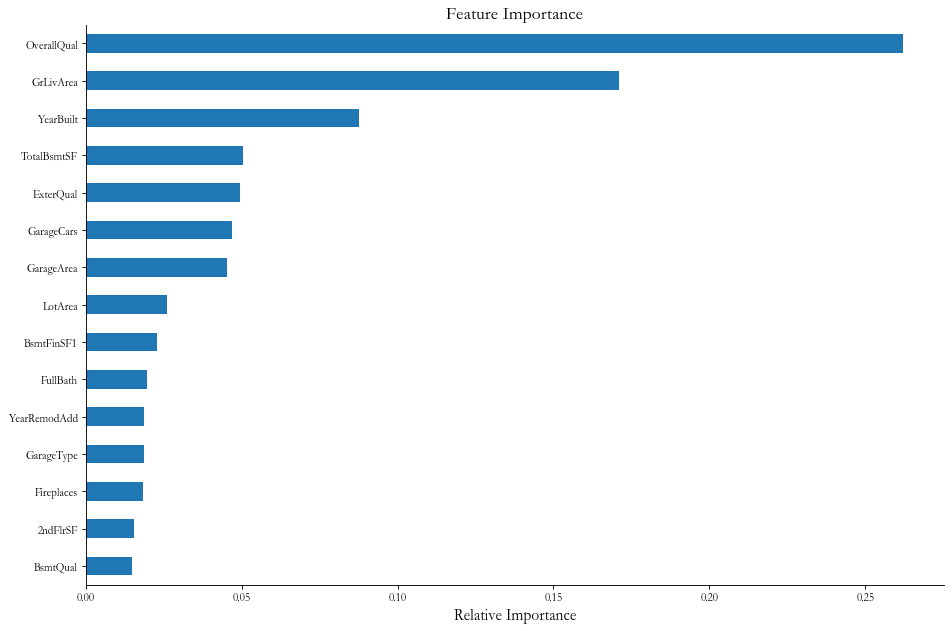

完成'训练决策树回归模型', 用时7345.197ms



In [4]:
print("=" * 50)
print("5.训练决策树回归模型")
print("=" * 50)
start_time = time.time()
rf_model_paper = RandomForestRegressor(
    n_estimators=500, max_features=0.4, max_samples=0.8, 
    criterion="friedman_mse", random_state=42
)
rf_model_paper.fit(X_train, y_train)
y_pred = rf_model_paper.predict(X_test)

print("MSE(RandomForestRegressor):", mean_squared_error(y_test, y_pred))
print("R2(RandomForestRegressor):", r2_score(y_test, y_pred))

# 保存模型
ModelsIO.saveModel(rf_model_paper, "rf_regressor_paper.pkl")

FeatureImportance(
    rf_model_paper.feature_importances_, X_train.columns, 
    is_save=False
)
top30 = list(X_train.columns[
    rf_model_paper.feature_importances_.argsort()[-30:][::-1]
])
end_time = time.time()
print(
    "完成'训练决策树回归模型', 用时%.3fms" % 
    ((end_time - start_time) * 1000), end="\n\n"
)

# 六、绘制决策树回归模型的学习曲线

6.绘制决策树回归模型的学习曲线


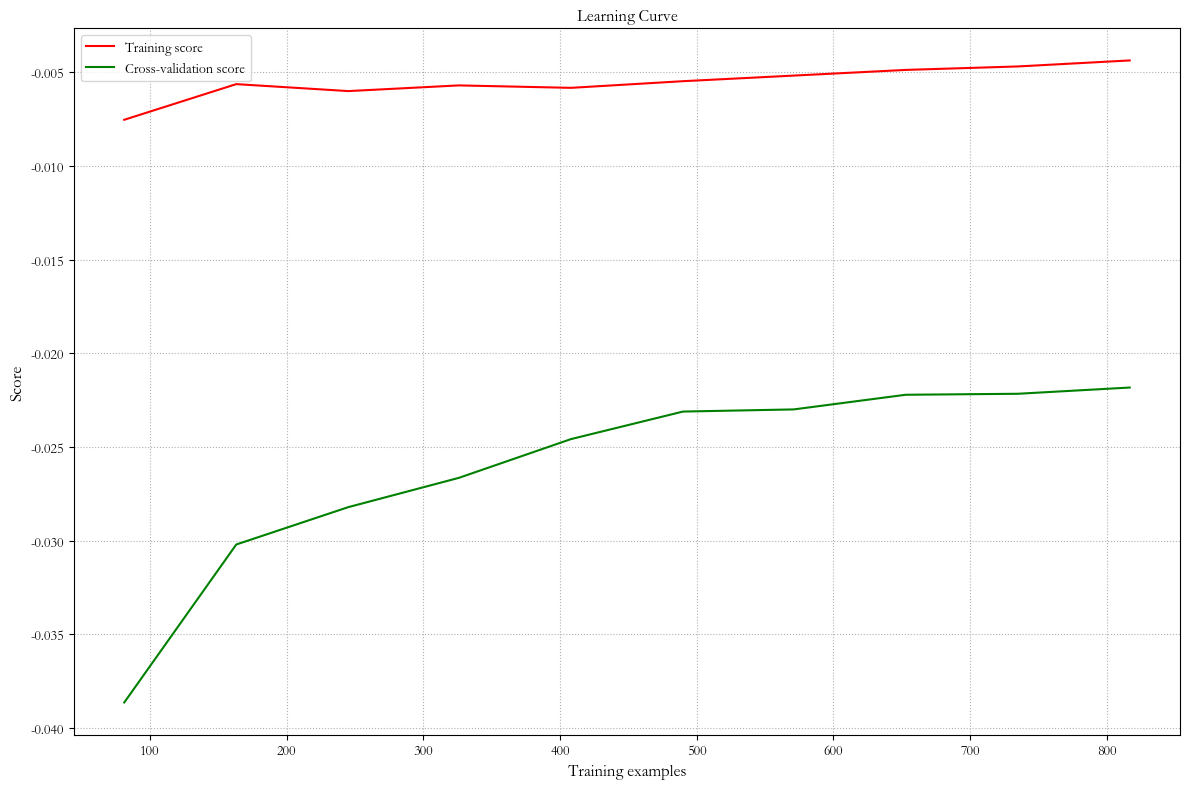

完成'绘制决策树回归模型的学习曲线', 用时43116.492ms



In [5]:
print("=" * 50)
print("6.绘制决策树回归模型的学习曲线")
print("=" * 50)
start_time = time.time()
cv = KFold(n_splits=5, shuffle=True, random_state=42)
_, ax = plt.subplots(figsize=(12, 8), dpi=100)
LearningCurve(
    rf_model_paper, X_train, y_train, cv=cv,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="neg_mean_squared_error", is_show_alone=False, ax=ax
)
ax.set_title("Learning Curve")
plt.tight_layout()
plt.show()
end_time = time.time()
print(
    "完成'绘制决策树回归模型的学习曲线', 用时%.3fms" % 
    ((end_time - start_time) * 1000), end="\n\n"
)

# 七、XGBoost回归网格搜索

In [ ]:
print("=" * 50)
print("6.XGBoost回归网格搜索")
print("=" * 50)
start_time = time.time()
param_grid_xgb_regressor = {
    "n_estimators": [100, 200, 300],
    "max_depth": [6, 7, 8],
    "learning_rate": [0.1, 0.2, 0.3],
    "objective": ["reg:squarederror", "reg:gamma"],
}
xgb_grid_regressor = GridSearchCV(
    estimator=XGBRegressor(), param_grid=param_grid_xgb_regressor, 
    cv=5, n_jobs=-1
)
xgb_grid_regressor.fit(X_train, y_train)
print(xgb_grid_regressor.best_params_)
end_time = time.time()
print(
    "完成'XGBoost回归网格搜索', 用时%.3fms" % 
    ((end_time - start_time) * 1000), end="\n\n"
)

# 八、训练XGBoost回归模型

8.训练XGBoost回归模型
MSE(XGBRegressor): 0.020192556310852035
R2(XGBRegressor): 0.8809725152844489


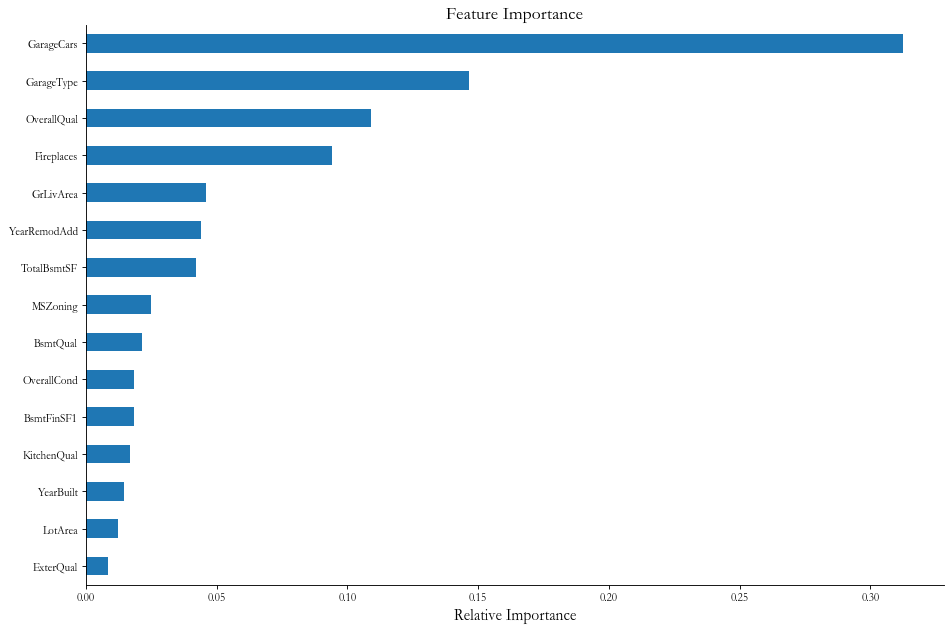

完成'训练XGBoost回归模型', 用时532.048ms



In [6]:
print("=" * 50)
print("8.训练XGBoost回归模型")
print("=" * 50)
start_time = time.time()
X_train_top30, X_test_top30 = X_train[top30], X_test[top30]

xgb_model_paper_best = XGBRegressor(
    max_depth=6, learning_rate=0.1, n_estimators=300, 
    objective='reg:gamma', random_state=42
)
xgb_model_paper_best.fit(X_train_top30, y_train)
y_pred = xgb_model_paper_best.predict(X_test_top30)

print("MSE(XGBRegressor):", mean_squared_error(y_test, y_pred))
print("R2(XGBRegressor):", r2_score(y_test, y_pred))

# 保存模型
ModelsIO.saveModel(xgb_model_paper_best, "xgb_regressor_paper.pkl")

FeatureImportance(
    xgb_model_paper_best.feature_importances_, X_train_top30.columns, 
    is_save=False
)
end_time = time.time()
print(
    "完成'训练XGBoost回归模型', 用时%.3fms" % 
    ((end_time - start_time) * 1000), end="\n\n"
)

# 九、绘制XGBoost回归模型的学习曲线

9.绘制XGBoost回归模型的学习曲线


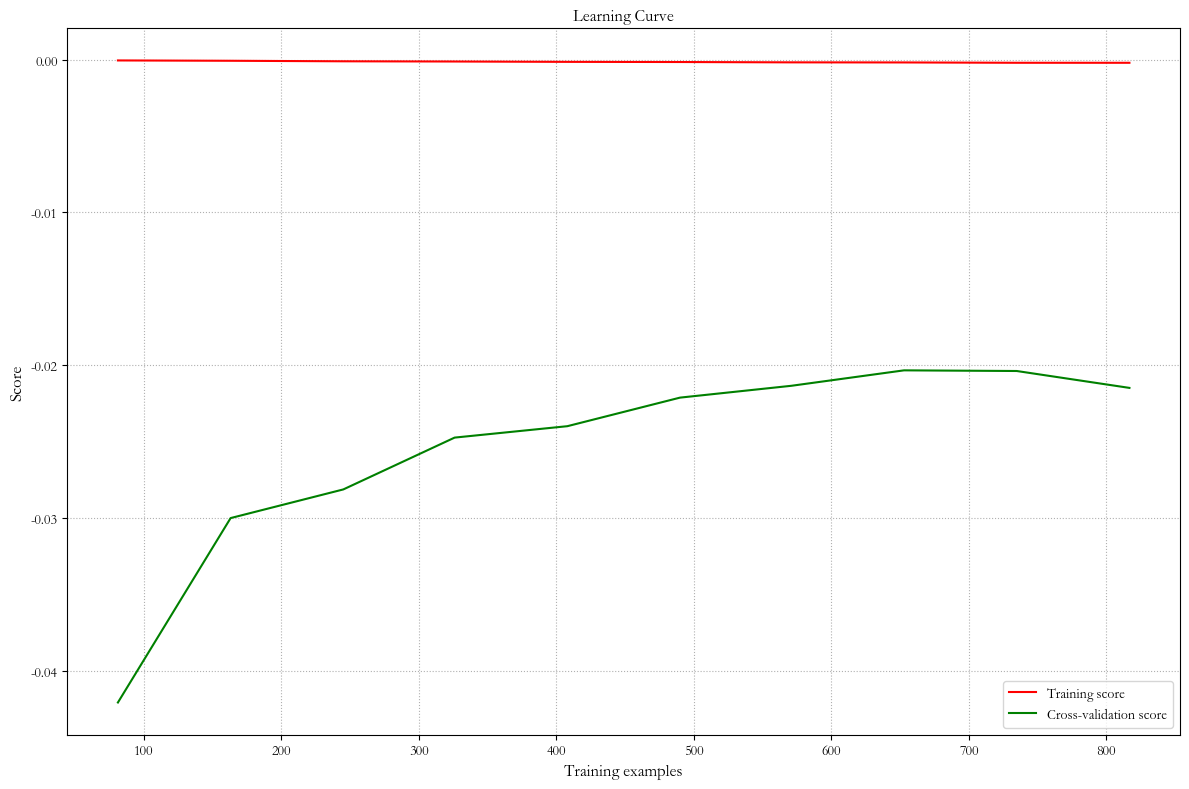

完成'绘制XGBoost回归模型的学习曲线', 用时3510.494ms



In [7]:
print("=" * 50)
print("9.绘制XGBoost回归模型的学习曲线")
print("=" * 50)
start_time = time.time()
cv = KFold(n_splits=5, shuffle=True, random_state=42)
_, ax = plt.subplots(figsize=(12, 8), dpi=100)
LearningCurve(
    xgb_model_paper_best, X_train_top30, y_train, cv=cv,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="neg_mean_squared_error", is_show_alone=False, ax=ax
)
ax.set_title("Learning Curve")
plt.tight_layout()
plt.show()
end_time = time.time()
print(
    "完成'绘制XGBoost回归模型的学习曲线', 用时%.3fms" % 
    ((end_time - start_time) * 1000), end="\n\n"
)

# 十、更换目标变量

In [8]:
print("=" * 50)
print("10.更换目标变量")
print("=" * 50)
start_time = time.time()
# 提取的标签
binary_label = row_data.SalePrice < row_data.SalePrice.median()
binary_label = binary_label.astype(int)

# 修改已经处理好的数据
data_piped = PipeLineForPaperHousingData().transform(row_data)
data_for_classification = data_piped.copy()
data_for_classification["SalePrice"] = binary_label

# 分离目标与自变量
X, y = TargetVaribleSplit(target="SalePrice").transform(data_for_classification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
end_time = time.time()
print(
    "完成'更换目标变量', 用时%.3fms" % 
    ((end_time - start_time) * 1000), end="\n\n"
)

10.更换目标变量
完成'更换目标变量', 用时360.362ms



# 十一、XGBoost分类模型网格搜索

In [ ]:
print("=" * 50)
print("11.XGBoost分类模型网格搜索")
print("=" * 50)
start_time = time.time()
param_grid_xgb_classifier = {
    "n_estimators": [100, 200, 300],
    "max_depth": [6, 7, 8],
    "learning_rate": [0.1, 0.2, 0.3],
    "eval_metric": ["auc", "error", "logloss"]
}
xgb_grid_classifier = GridSearchCV(
    estimator=XGBClassifier(), param_grid=param_grid_xgb_classifier,
    cv=5, n_jobs=-1
)
xgb_grid_classifier.fit(X_train, y_train)
print(xgb_grid_classifier.best_params_)
end_time = time.time()
print(
    "完成'XGBoost分类模型网格搜索', 用时%.3fms" % 
    ((end_time - start_time) * 1000), end="\n\n"
)

# 十二、训练XGBoost分类模型

12.训练XGBoost分类模型

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       220
           1       0.93      0.92      0.93       218

    accuracy                           0.93       438
   macro avg       0.93      0.93      0.93       438
weighted avg       0.93      0.93      0.93       438

Confusion Matrix:
 [[205  15]
 [ 17 201]]


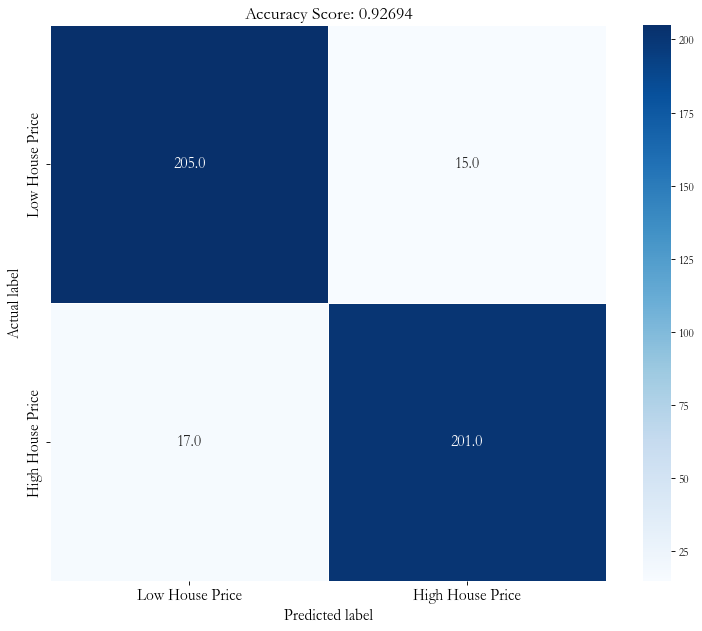

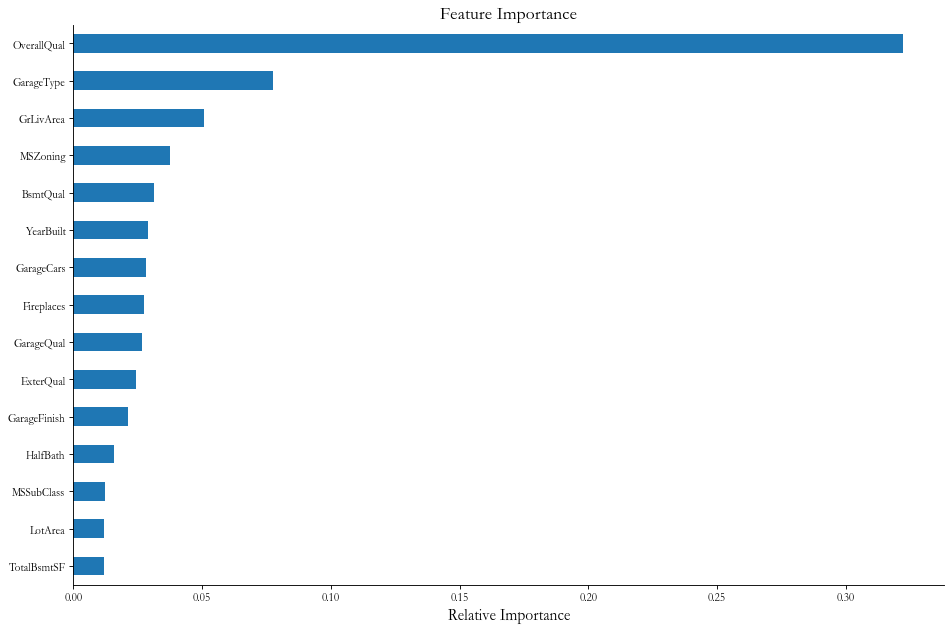

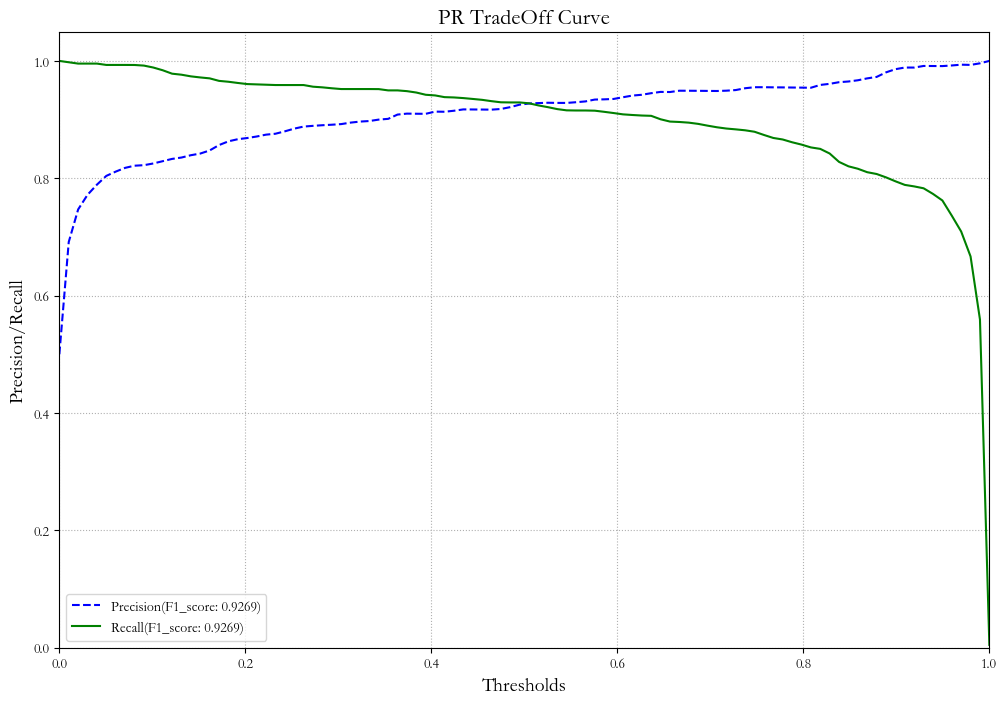

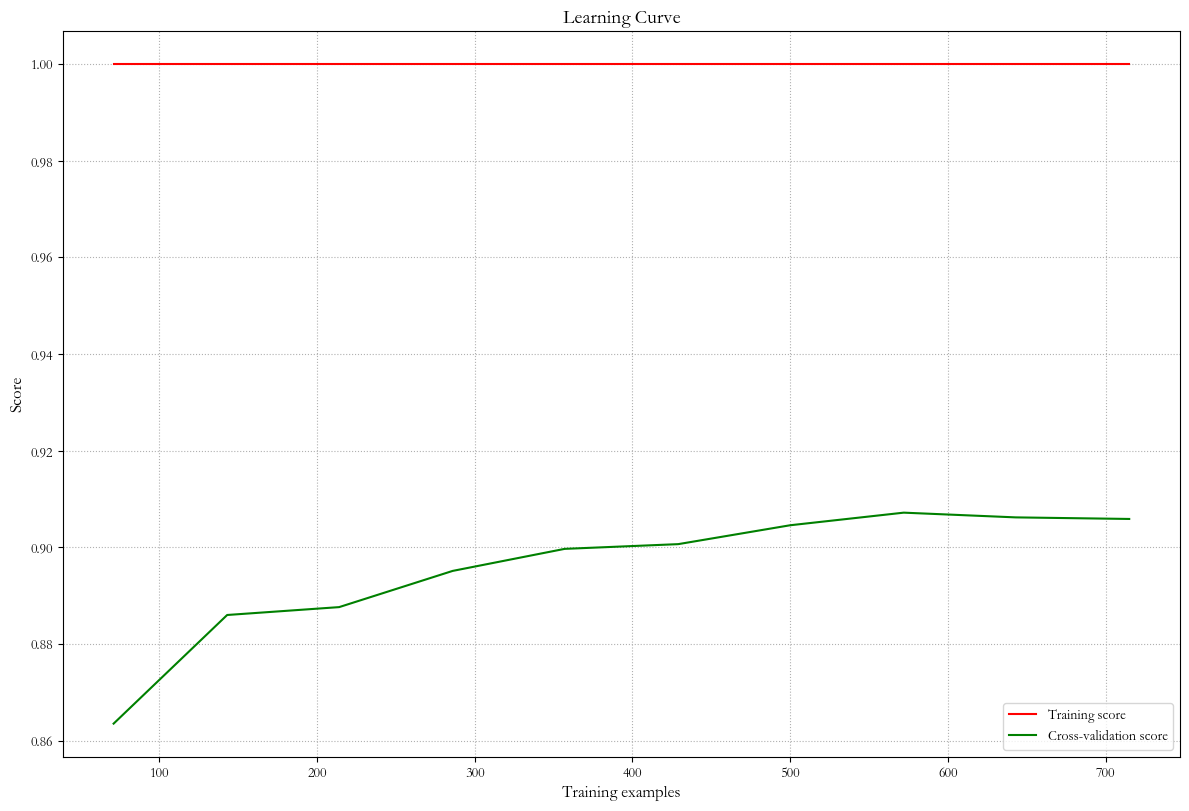

完成'更换目标变量，并训练XGBClassifier', 用时4008.139ms

完成'训练XGBoost分类模型', 用时4008.337ms



In [9]:
print("=" * 50)
print("12.训练XGBoost分类模型")
print("=" * 50)
start_time = time.time()
clf_xgb = XGBClassifier(
    # n_estimators=200, max_depth=7, learning_rate=0.3, 
    # eval_metric="auc", random_state=42
    n_estimators=100, max_depth=8, learning_rate=0.1,
    eval_metric="auc", random_state=42
)
clf_xgb.fit(X_train, y_train)

# 预测并计算相关指标
y_pred = clf_xgb.predict(X_test)
y_score = clf_xgb.predict_proba(X_test)
print("\nClassification Report: \n", classification_report(y_test, y_pred))

# 保存模型
ModelsIO.saveModel(clf_xgb, "xgb_classifier_paper.pkl")

# 可视化混淆矩阵
label_mapping = {0: "Low House Price", 1: "High House Price"}
ConfusionMatrix(y_test, y_pred, label_map=list(label_mapping.values()))

# 绘制出特征重要性
FeatureImportance(clf_xgb.feature_importances_, X_train.columns)

# 绘制Precision和Recall曲线
PRTradeOffCurve(y_test, y_score)

# 绘制学习曲线
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
LearningCurve(clf_xgb, X_train, y_train, cv=cv, scoring="accuracy")
end_time = time.time()
print(
    "完成'更换目标变量，并训练XGBClassifier', 用时%.3fms" % 
    ((end_time - start_time) * 1000), end="\n\n"
)
end_time = time.time()
print(
    "完成'训练XGBoost分类模型', 用时%.3fms" % 
    ((end_time - start_time) * 1000), end="\n\n"
)